# Assignment 10: Dimensionality Reduction

Dataset(s) needed: MNIST ("Modified National Institute of Standards and Technology") dataset.

(70000, 784) (70000,)
Size of the dataframe: (70000, 786)


<Figure size 432x288 with 0 Axes>

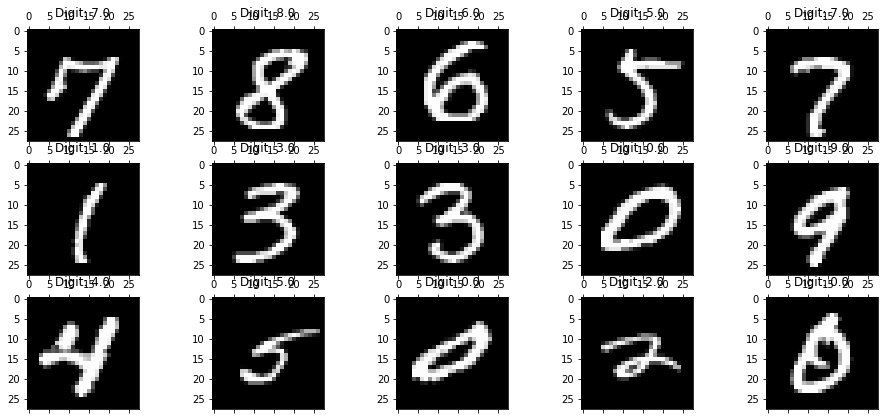

In [4]:
#Load the MNIST dataset
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn import (
    ensemble,
    model_selection,    
    preprocessing,
    tree,
)
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
)

import pandas_profiling
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
X = mnist.data / 255.0
y = mnist.target
print(X.shape, y.shape)


#Convert to dataframe
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))

X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))
df.head(20)


# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

<h3> Q.1. Split the data into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).
</h3>

In [5]:
#TODO
#train_x, test_x, train_y, test_y  = train_test_split(X, y, test_size=0.1428, shuffle=False)
df.head(50)
X = df.loc[:, df.columns != 'y']
y = df.loc[:, df.columns == 'y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.142847, shuffle=False)
print(X_train.shape)
print(X_test.shape)

(60000, 785)
(10000, 785)


<h3> Q.2. Train a Logistic Regression classifier on the dataset and see how long it takes.</h3>

In [6]:
from sklearn.linear_model import LogisticRegression
import time

# default solver is incredibly slow which is why it was changed to 'lbfgs'
log_clf = LogisticRegression(solver = 'lbfgs')
start_time = time.time()
log_clf.fit(X_train,y_train)
print("Coef: ", log_clf.coef_)
print("Intercept: ",log_clf.intercept_)
end_time = time.time()

print("Training took {:.2f}s".format(end_time - start_time))

Coef:  [[ 0.          0.          0.         ...  0.          0.
  -5.4163482 ]
 [ 0.          0.          0.         ...  0.          0.
  -5.55677728]
 [ 0.          0.          0.         ...  0.          0.
  -1.13546235]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.4967135 ]
 [ 0.          0.          0.         ...  0.          0.
   3.19663485]
 [ 0.          0.          0.         ...  0.          0.
   8.70579556]]
Intercept:  [  1.0314025    7.56964805  -0.98237954  -2.31702984   1.24702882
  -0.53011472 -10.74983206  -3.60497315 -30.33975802 -72.44295616]
Training took 65.26s


<h3> Q.3. Evaluate the resulting model on the test set.</h3>

In [43]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

y_pred=log_clf.predict(X_test)
log_clf.score(X_test, y_test)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))


Accuracy: 0.9684


<h3> Q.4. Use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.</h3>

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Make an instance of the Model
pca = PCA(.95)

# Standardise the data
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(60000, 331)
(10000, 331)


<h3> Q.5. Train a new Logistic Regression classifier on the reduced dataset and see how long it takes. Was training much faster? Explain your results.
</h3>

In [50]:
start_time = time.time()

# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, y_train)

print("Coef: ", logisticRegr.coef_)
print("Intercept: ",logisticRegr.intercept_)
end_time = time.time()

print("Training took {:.2f}s".format(end_time - start_time))

# Training was faster in time. On average I am seeing huge improvements in performance.

Coef:  [[ 0.93828683 -0.60685083  0.14082851 ... -0.23230136  0.1120174
   0.14933885]
 [-1.07545448 -0.92789515  1.15510612 ... -0.37206927  0.06447219
  -0.30371542]
 [ 0.10457117 -0.24657088  0.81812712 ... -0.10516701 -0.08641928
   0.28919301]
 ...
 [-0.74624089  0.68201479 -1.023926   ... -0.07712653 -0.04804423
  -0.20731311]
 [-0.39837398 -0.08318566  0.08835431 ...  0.03197928 -0.03566334
  -0.1722748 ]
 [-1.01549208  0.98831247 -1.70948876 ...  0.34057328  0.24667098
  -0.11314301]]
Intercept:  [-15.73478696 -22.63490642  -8.36720268  -8.43641777  -9.7264175
  -7.33599396 -13.92899002 -11.99327362 -13.59840342 -26.77630772]
Training took 33.79s


<h3> Q.6. Evaluate the new classifier on the test set: how does it compare to the previous classifier? Discuss the speed / accuracy trade-off and in which case you'd prefer a very slight drop in model performance for a x-time speedup in training.
</h3>

In [52]:
y_pred=logisticRegr.predict(X_test)
logisticRegr.score(X_test, y_test)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

print('Number of PCA components: ' + len(pca.components_))

# Number of components: 331 for variance retained: 95%
# The accuracy dropped a little. But the speed of execution was very high.
# Especially, with these kind of situations where mumber of features were so high, that execution was taking a very long time,
# it makes sense to perform PCA with a known variance retained.
# Also for quick model visualization and model explainabity, PCA is preferred.

Accuracy: 0.9656


331

<h3> Q.7. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                    
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

PCA was very interesting exercise to play with. The dataset was huge and I noticed considerable amount of execution time.
Overall the assignment was designed well for us to understand the usage of PCA and when to use it.
I will play with different values of variance retained and see how that affects the performance of the model.

I can see a lot of real world applications for this. Model explainability and visualization are two most important use cases of PCA. And it makes sense to use it to get these benefits out of the model.